In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Code testing

In [20]:
D = np.array([[0,93,82, 133], 
              [93,0,52 ,60],
              [82,52,0,111],
              [133, 60,111,0]])


In [19]:
n = D.shape[0]

I = np.eye(n)

# column vector of ones of dim = (n,1)
one = np.ones(n).reshape(-1,1)

# operator
H = I - (1./n)*np.dot(one, one.T)
H

array([[ 0.75, -0.25, -0.25, -0.25],
       [-0.25,  0.75, -0.25, -0.25],
       [-0.25, -0.25,  0.75, -0.25],
       [-0.25, -0.25, -0.25,  0.75]])

In [20]:
B = -0.5*np.matmul(H, np.matmul(D**2, H.T))
B

array([[ 5035.0625, -1553.0625,   258.9375, -3740.9375],
       [-1553.0625,   507.8125,     5.3125,  1039.9375],
       [  258.9375,     5.3125,  2206.8125, -2471.0625],
       [-3740.9375,  1039.9375, -2471.0625,  5172.0625]])

In [21]:
eig_vals, eig_vecs = np.linalg.eig(B)
srt = np.argsort(eig_vals)[::-1] # indices of eigenvalues from largest to smallest
eig_vals_srtd = eig_vals[srt] # sorted eigenvalues
eig_vecs_srtd = eig_vecs[:, srt] # sorted eigenvectors




In [31]:
Eval_2 = eig_vals_srtd[:2]
Eval_2

array([9724.16760032, 3160.98584073])

In [32]:
Evec_2 = eig_vecs_srtd[:, :2]
Evec_2

array([[-0.63715969,  0.58649822],
       [ 0.18662069, -0.21391682],
       [-0.25311714, -0.70631521],
       [ 0.70365614,  0.33373381]])

In [30]:
X = np.matmul(Evec_2, np.diag(np.sqrt(Eval_2)))
X

array([[-62.83107784,  32.9744814 ],
       [ 18.40288902, -12.02696922],
       [-24.96018328, -39.71090964],
       [ 69.38837211,  18.76339745]])

In [2]:
def apply_MDS(D, k=2):
    # dimension of the distance matrix
    n = D.shape[0]

    I = np.eye(n)

    # column vector of ones of dim = (n,1)
    one = np.ones(n).reshape(-1,1)

    # operator
    H = I - (1./n)*np.dot(one, one.T)
    
    B = -0.5*np.matmul(H, np.matmul(D**2, H.T))

    # find evals, and eig vectors
    eig_vals, eig_vecs = np.linalg.eig(B)
    srt = np.argsort(eig_vals)[::-1] # indices of eigenvalues from largest to smallest
    eig_vals_srtd = eig_vals[srt] # sorted eigenvalues
    eig_vecs_srtd = eig_vecs[:, srt] # sorted eigenvectors

    # select first k largest evals and evectors
    Eval_2 = eig_vals_srtd[:k]
    Evec_2 = eig_vecs_srtd[:,:k]

    # coordinates of dimension, n x k
    X = np.matmul(Evec_2, np.diag(np.sqrt(Eval_2)))
    return X

    
    

    
    

In [22]:
apply_MDS(D)

array([[-62.83107784,  32.9744814 ],
       [ 18.40288902, -12.02696922],
       [-24.96018328, -39.71090964],
       [ 69.38837211,  18.76339745]])

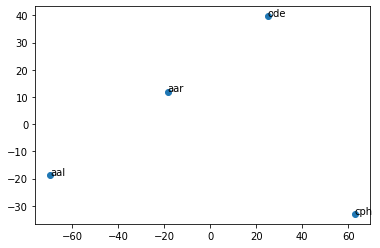

In [38]:
plt.scatter(X[:,0], X[:,1])

city_names = ["cph", "aar", "ode", "aal"]
for i in range(X.shape[0]):    
    plt.text(X[i,0], X[i,1], s = city_names[i])
    
plt.show()

# CODE testing ends here #########################################

# Real world application, Mapping 6 Italian cities using MDS

In [ ]:
Rome 41.89193, 12.51133
Milan 	45.46427, 9.18951
Naples 	40.85216, 14.26811
Turin 	45.07049, 7.68682
Palermo 	38.13205, 13.33561
Genoa 	44.40478, 8.94439
Bologna 	44.49381, 11.33875
Florence 	43.77925, 11.24626
Catania 	37.49223, 15.07041
Bari 	41.12066, 16.86982
Messina 	38.19394, 15.55256
Verona 	45.4299, 10.98444
Brescia 	45.53558, 10.21472
Prato 	43.8805, 11.09699
Taranto 	40.46438, 17.24707
Modena 	44.64783, 10.92539
Livorno 	43.54427, 10.32615
Cagliari 	39.23054, 9.11917
Mestre 	45.49167, 12.24538
Andria 	41.23117, 16.29797

In [3]:
cities = ["BA","FI", "MI", "NA", "RM", "TO" ]

lat_long_coord = np.array([[41.12066, 16.86982], 
                           [43.7695604, 11.2558136],
                          [45.46427, 9.18951],
                          [40.85216, 14.26811],
                          [41.89193, 12.51133],
                          [45.07049, 7.68682]])
long_lat_coord = lat_long_coord[:,::-1]

In [4]:
df_longlat = pd.DataFrame({"cities":cities,
             "Longitude":long_lat_coord[:,0] ,
             "Latitude": long_lat_coord[:,1]})
df_longlat

,cities,Longitude,Latitude
0,BA,16.869820,41.12066
1,FI,11.255814,43.76956
2,MI,9.189510,45.46427
3,NA,14.268110,40.85216
4,RM,12.511330,41.89193
5,TO,7.686820,45.07049


In [200]:
df_longlat.to_latex(index=False, multirow=True)

'\\begin{tabular}{lrr}\n\\toprule\ncities &  Longitude &  Latitude \\\\\n\\midrule\n    BA &  16.869820 &  41.12066 \\\\\n    FI &  11.255814 &  43.76956 \\\\\n    MI &   9.189510 &  45.46427 \\\\\n    NA &  14.268110 &  40.85216 \\\\\n    RM &  12.511330 &  41.89193 \\\\\n    TO &   7.686820 &  45.07049 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [119]:
def transform(lat, lon, R=6371):# radius of earth = 6371 km
    x = R*np.cos(np.radians(lat)) * np.cos(np.radians(lon))
    y = R*np.cos(np.radians(lat)) * np.sin(np.radians(lon))
    z = R*np.sin(np.radians(lat))
    return x,y,z


In [120]:
# Obtain x, y, z coordinates from longitude and latitudes

long = long_lat_coord[:,0]
lat = long_lat_coord[:,1]
x, y, z = transform( lat, long)

In [121]:
df_xyz = pd.DataFrame({"cities":cities,
             "x":x ,
             "y": y,
             "z":z })

In [130]:
df_xyz

,cities,x,y,z
0,BA,4592.905463,1392.789207,4189.868570
1,FI,4512.184679,898.005296,4407.200576
2,MI,4410.977158,713.593663,4541.333019
3,NA,4670.371562,1187.694822,4167.331459
4,RM,4629.986266,1027.403844,4254.093266
5,TO,4458.999586,601.835956,4510.516287


In [47]:
import sklearn.neighbors


In [48]:
import sklearn.metrics

In [131]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
dist_matrix = (dist.pairwise
    (df_xyz[["x","y","z"]],
     df_xyz[["x","y","z"]]))


In [132]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=df_xyz['cities'], 
                 columns=df_xyz['cities']) 
                )

In [133]:
df_dist_matrix

cities,BA,FI,MI,NA,RM,TO
cities,,,,,,
BA,0.000000,546.406592,786.086353,220.391980,372.835434,863.917119
FI,546.406592,0.000000,249.483717,408.019980,232.514616,318.149444
MI,786.086353,249.483717,0.000000,657.217264,478.485627,125.481511
NA,220.391980,408.019980,657.217264,0.000000,186.686316,711.115004
RM,372.835434,232.514616,478.485627,186.686316,0.000000,525.449558
TO,863.917119,318.149444,125.481511,711.115004,525.449558,0.000000


In [134]:
long_lat_coord

array([[16.86982  , 41.12066  ],
       [11.2558136, 43.7695604],
       [ 9.18951  , 45.46427  ],
       [14.26811  , 40.85216  ],
       [12.51133  , 41.89193  ],
       [ 7.68682  , 45.07049  ]])

In [135]:
dist_matrix

array([[  0.        , 546.40659244, 786.08635294, 220.39198027,
        372.83543433, 863.91711896],
       [546.40659244,   0.        , 249.483717  , 408.01998031,
        232.51461588, 318.14944378],
       [786.08635294, 249.483717  ,   0.        , 657.21726417,
        478.48562688, 125.48151103],
       [220.39198027, 408.01998031, 657.21726417,   0.        ,
        186.68631625, 711.11500433],
       [372.83543433, 232.51461588, 478.48562688, 186.68631625,
          0.        , 525.4495585 ],
       [863.91711896, 318.14944378, 125.48151103, 711.11500433,
        525.4495585 ,   0.        ]])

In [136]:
# symmetric matrix
(dist_matrix==dist_matrix.T).all()

True

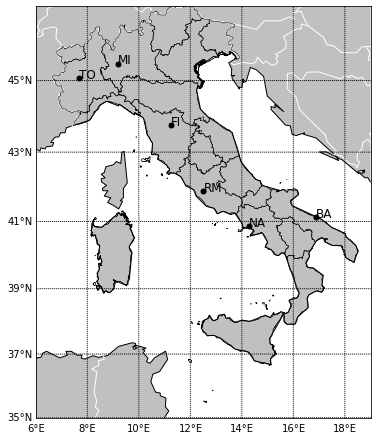

In [211]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution='c',lat_1=35.,lat_2=47,lat_0=6,lon_0=19)

plt.figure(figsize=(6,8))

ll_lon, ur_lon, ll_lat, ur_lat =  6, 19,35, 47
m = Basemap( projection="merc", resolution='l',
            llcrnrlon = ll_lon, urcrnrlon = ur_lon,
            llcrnrlat = ll_lat, urcrnrlat = ur_lat,
           )



# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.

#m.drawmapboundary(fill_color='aqua')
#m.drawcountries(linewidth=0.5)

m.drawcountries(color='#ffffff', linewidth=1)
m.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
m.readshapefile(r'ITA_adm/ITA_adm1', 'states', drawbounds = True)


# fill continents, set lake color same as ocean color.
#m.fillcontinents(color='coral',lake_color='aqua')

parallels = np.arange(ll_lat, ur_lat, 2)
# label = [left, right, top, bottom]
m.drawparallels(parallels,labels=[1, 0, 0, 0])
meridians = np.arange(ll_lon, ur_lon, 2)
m.drawmeridians(meridians,labels=[0,0,0,1])

lats = lat_long_coord[:,0]
lons = lat_long_coord[:,1]
x, y = m(lons, lats)
plt.plot(x, y, 'bo', color='black', markersize=5)

for i in range(len(cities)):
    plt.text(x[i], y[i], cities[i], fontsize=12)

#m.scatter(lat_long_coord[:,1], lat_long_coord[:,0], latlon=True, s=200)
plt.savefig("italy_map.png", dpi=300, facecolor="white", bbox_inches="tight")


plt.show()

In [166]:
def rotate_xy(xy_array, angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    return (R.dot(xy_array.T)).T

In [167]:
rotate_xy(np.array([[1,1],[1,1]]), angle=90)

array([[-1.,  1.],
       [-1.,  1.]])

In [137]:
dist_matrix

array([[  0.        , 546.40659244, 786.08635294, 220.39198027,
        372.83543433, 863.91711896],
       [546.40659244,   0.        , 249.483717  , 408.01998031,
        232.51461588, 318.14944378],
       [786.08635294, 249.483717  ,   0.        , 657.21726417,
        478.48562688, 125.48151103],
       [220.39198027, 408.01998031, 657.21726417,   0.        ,
        186.68631625, 711.11500433],
       [372.83543433, 232.51461588, 478.48562688, 186.68631625,
          0.        , 525.4495585 ],
       [863.91711896, 318.14944378, 125.48151103, 711.11500433,
        525.4495585 ,   0.        ]])

In [138]:
xy_coord = apply_MDS(dist_matrix)


In [150]:
long_lat_coord

array([[16.86982  , 41.12066  ],
       [11.2558136, 43.7695604],
       [ 9.18951  , 45.46427  ],
       [14.26811  , 40.85216  ],
       [12.51133  , 41.89193  ],
       [ 7.68682  , 45.07049  ]])

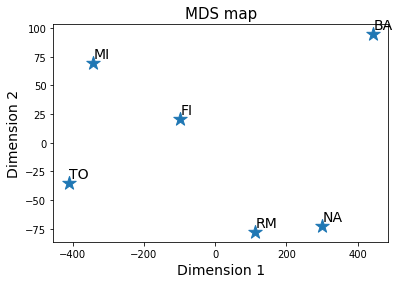

In [191]:
xy_coord = apply_MDS(dist_matrix)

#xy_coord = rotate_xy(xy_coord, 30)

## Reflect along x axis.
xy_coord[:,0] = -xy_coord[:,0]
x = xy_coord[:,0]
y = xy_coord[:,1]


#plt.figure(figsize=(7,7))
plt.scatter(x,y, marker = "*", s=200)
for i in range(len(x)):    
    plt.text(x[i]+2,y[i]+4, s = cities[i], fontsize=14)
    
plt.xlabel("Dimension 1", size=14)
plt.ylabel("Dimension 2", size=14)
plt.title("MDS map", size=15)
plt.savefig("direct_mds.png", dpi=300, facecolor="white", bbox_inches="tight")

plt.show()


In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(long_lat_coord)
std_long_lat = scaler.transform(long_lat_coord)
std_long_lat



array([[ 1.6035282 , -1.0365323 ],
       [-0.23131767,  0.40286185],
       [-0.9066551 ,  1.32375532],
       [ 0.75320198, -1.18243334],
       [ 0.17902726, -0.61742952],
       [-1.39778467,  1.10977799]])

In [171]:
# distance list between old and new coordinates
def mean_distance(XY_std, std_long_lat):
    d = []
    for i in range(XY_std.shape[0]):
        #d.append(np.sqrt(sum( (XY_std[i,:]-std_lat_long[i,:])**2  ) ) )
        d.append(np.linalg.norm(XY_std[i,:]-std_long_lat[i,:]))
    mean_d = np.mean(d)
    return mean_d



In [183]:
angle_list = []
mean_distance_list = []
for i in range(1,360):
    
    xy_rotated = rotate_xy(xy_coord, i)
    
    scaler = StandardScaler()
    scaler.fit(xy_rotated)
    xy_rotated_std = scaler.transform(xy_rotated)
    
    angle_list.append(i)
    #mean_distance_list.append(np.linalg.norm(xy_rotated_std[0,:]-std_long_lat[0,:]))
    
    mean_distance_list.append(  mean_distance(xy_rotated_std, std_long_lat)  )

In [184]:
theta_opt = angle_list[np.argmin(mean_distance_list)]
theta_opt

321

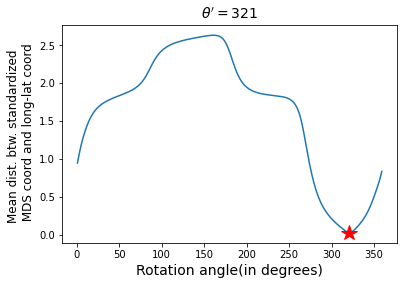

In [185]:
plt.plot(angle_list, mean_distance_list)
plt.plot(theta_opt, min(mean_distance_list),"*", c="r", markersize=16)
plt.xlabel("Rotation angle(in degrees)",size=14)
plt.ylabel("Mean dist. btw. standardized \n MDS coord and long-lat coord", size=12)

plt.title("$\\theta' = %d$"%theta_opt, size=14)
plt.savefig("optimal_theta.png", dpi=300, facecolor="white", bbox_inches="tight")


plt.show()

In [186]:

xy_rotated = rotate_xy(xy_coord,theta_opt )

scaler = StandardScaler()
scaler.fit(xy_rotated)
xy_rotated_std = scaler.transform(xy_rotated)


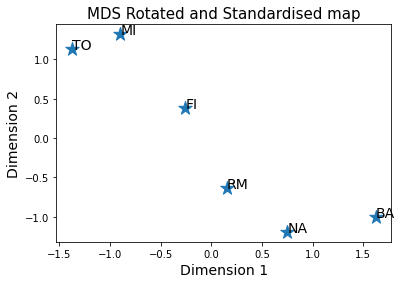

In [187]:
x = xy_rotated_std[:,0]
y = xy_rotated_std[:,1]


plt.scatter(x,y, marker = "*", s=200)
for i in range(len(x)):    
    plt.text(x[i],y[i], s = cities[i], fontsize=14)
    
plt.xlabel("Dimension 1", size=14)
plt.ylabel("Dimension 2", size=14)
plt.title("MDS Rotated and Standardised map", size=15)
plt.savefig("rotated_std_mds.png", dpi=300, facecolor="white", bbox_inches="tight")

plt.show()


In [188]:
mean_longlat = np.mean(long_lat_coord, axis=0)
sd_longlat = np.std(long_lat_coord, axis=0)


In [189]:
mds_longlat = xy_rotated_std*sd_longlat + mean_longlat
mds_longlat

array([[16.93788357, 41.18549133],
       [11.17766294, 43.72924717],
       [ 9.21858963, 45.45663377],
       [14.26386583, 40.83486588],
       [12.43409715, 41.85136829],
       [ 7.74930448, 45.11146397]])

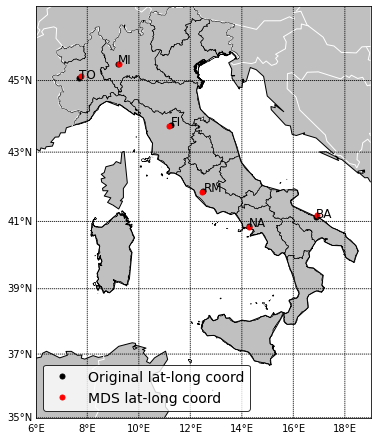

In [190]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))

ll_lon, ur_lon, ll_lat, ur_lat =  6, 19,35, 47
m = Basemap( projection="merc", resolution='l',
            llcrnrlon = ll_lon, urcrnrlon = ur_lon,
            llcrnrlat = ll_lat, urcrnrlat = ur_lat,
           )



# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.

#m.drawmapboundary(fill_color='aqua')
#m.drawcountries(linewidth=0.5)

m.drawcountries(color='#ffffff', linewidth=1)
m.fillcontinents(color='#c0c0c0', lake_color='#ffffff')
m.readshapefile(r'ITA_adm/ITA_adm1', 'states', drawbounds = True)


# fill continents, set lake color same as ocean color.
#m.fillcontinents(color='coral',lake_color='aqua')

parallels = np.arange(ll_lat, ur_lat, 2)
# label = [left, right, top, bottom]
m.drawparallels(parallels,labels=[1, 0, 0, 0])
meridians = np.arange(ll_lon, ur_lon, 2)
m.drawmeridians(meridians,labels=[0,0,0,1])

lons = long_lat_coord[:,0]
lats = long_lat_coord[:,1]
x, y = m(lons, lats)
plt.plot(x, y, 'bo', color='black', markersize=5, label = "Original lat-long coord")

for i in range(len(cities)):
    plt.text(x[i], y[i], cities[i], fontsize=12)

lons = mds_longlat[:,0]
lats = mds_longlat[:,1]
x, y = m(lons, lats)
plt.plot(x, y, 'bo', color='red', markersize=5, label = "MDS lat-long coord")
plt.legend(loc="lower left", prop={"size":14},edgecolor="black" )
#m.scatter(lat_long_coord[:,1], lat_long_coord[:,0], latlon=True, s=200)
plt.savefig("mds_fit_italy_map.png", dpi=300, facecolor="white", bbox_inches="tight")


plt.show()